# House Price Regression Competition

Goal: predict the sale price of the house based on given data.
 
Data:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques
 
Steps:
 
1. Explore the data, create table variables with three columns:
    1. variable name;
    2. variable type (numerical or categorical);
    3. your opinion on the impact of the variable on the house price.
 
2. Encode character categorical features to Dummy variables.
 
3. Plot the histogram of sale house price, calculate basic statistics (with describe function).
 
4. Eliminate columns with more than 15% missing data.
 
5. Calculate Pearson correlation coefficient between SalePrice and remaining features. Select most important variables.
 
6. Draw cross correlation heatmap for selected variables. Remove redundant features.
 
7. Perform Linear Regression without regularization. Submit to Kaggle. Record overall standing.
 
8. Perform Elastic Net Regression. Submit to Kaggle. Record overall standing.
 
9. Add synthetic features (ie polynomials of default features up to 3rd degree). Perform Elastic Net Regression. Submit to Kaggle. Record overall standing.
 
10. Post your standings into Telegram group.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 12]

## 1. Explore the data.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test['SalePrice'] = np.NaN

In [3]:
all_data = train.append(test)
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
features_desc = pd.DataFrame({'feature': all_data.columns, 'type': all_data.dtypes, 'imact': 'Medium'})
features_desc['type'].replace({'int64': 'numerical', 'float64': 'numerical', 'object': 'categorical'}, inplace=True)
features_desc.head()

,feature,imact,type
Id,Id,Medium,numerical
MSSubClass,MSSubClass,Medium,numerical
MSZoning,MSZoning,Medium,categorical
LotFrontage,LotFrontage,Medium,numerical
LotArea,LotArea,Medium,numerical


## 3. Plot the histogram of sale house price, calculate basic statistics.

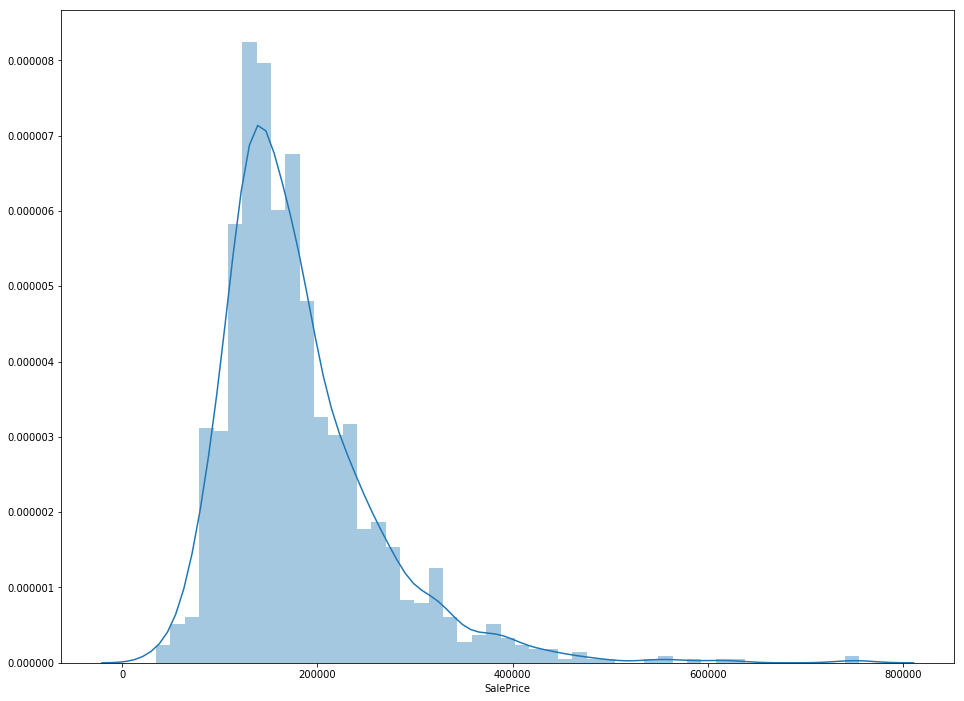

In [5]:
sns.distplot(train['SalePrice'])

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 4. Eliminate columns with more than 15% missing data.

In [7]:
thresh = 0.85 * len(train)
train.dropna(thresh=thresh, axis=1, inplace=True)

## 5. Calculate Pearson correlation coefficient between SalePrice and remaining features. Select most important variables.

In [8]:
corr = train.corr()
corr

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


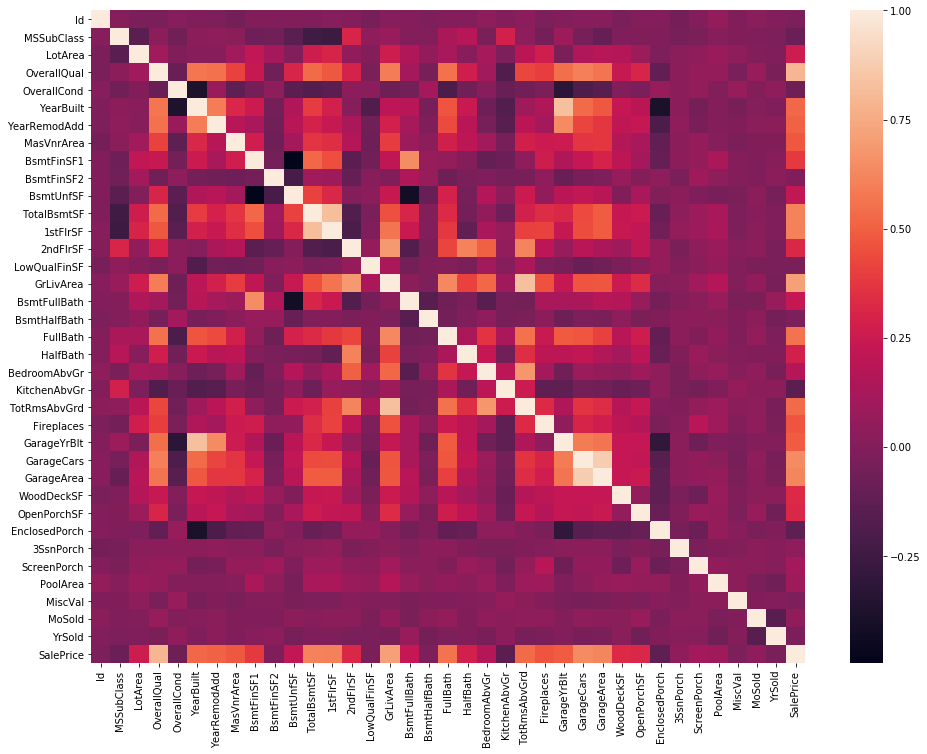

In [9]:
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns)

## 2. Encode character categorical features to Dummy variables.

In [10]:
numerical_features = all_data.select_dtypes(include=[np.number]).columns.values.tolist()
numerical_features.remove('Id')
numerical_features.remove('SalePrice')

In [11]:
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())
all_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


In [12]:
categorical_features = [name for name in all_data.columns.values.tolist() if name not in numerical_features]

In [13]:
# normalize
all_data[numerical_features] = all_data[numerical_features].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

## 7. Perform Linear Regression without regularization.

In [14]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [15]:
X_train = all_data[:len(train)].drop('SalePrice', axis=1)
y_train = np.log(train['SalePrice'])
X_test = all_data[len(train):].drop('SalePrice', axis=1)

In [16]:
lr = linear_model.LinearRegression()
lr_model = lr.fit(X_train, y_train)

/Users/lev/.pyenv/versions/3.6.3/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [17]:
scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Количество итераций: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций:  5
Средняя правильность: 0.84


### Predicting

In [18]:
lr_y_pred = np.exp(lr_model.predict(X_test))

In [19]:
lr_predictions = pd.DataFrame({'Id': X_test['Id'], 'SalePrice': lr_y_pred}).set_index('Id')

In [20]:
lr_predictions.to_csv('lr_predictions.csv')

## 8. Perform Elastic Net Regression

In [21]:
enet = linear_model.ElasticNetCV(normalize=True)
enet_model = enet.fit(X_train, y_train)

In [22]:
scores = cross_val_score(enet, X_train, y_train, cv=5)
print("Количество итераций: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций:  5
Средняя правильность: 0.88


In [23]:
enet_y_pred = np.exp(enet.predict(X_test))

In [24]:
enet_predictions = pd.DataFrame({'Id': X_test['Id'], 'SalePrice': enet_y_pred}).set_index('Id')

In [25]:
enet_predictions.to_csv('enet_predictions.csv')

## 9. Add synthetic features (ie polynomials of default features up to 3rd degree).

In [26]:
for degree in [2, 3]:
    new_numerical_features = []
    for feature in numerical_features:
        new_feature = feature + '^' + str(degree)
        X_train[new_feature] = X_train[feature].apply(lambda x: x ** (degree))
        X_test[new_feature] = X_test[feature].apply(lambda x: x ** (degree))
        new_numerical_features.append(new_feature)
    numerical_features.extend(new_numerical_features)
    
    enet = linear_model.ElasticNetCV(normalize=True)
    enet_model = enet.fit(X_train, y_train)
    scores = cross_val_score(enet, X_train, y_train, cv=5)
    print("Количество итераций: ", len(scores))
    print("Средняя правильность: {:.2f}".format(scores.mean()))
    
    enet_y_pred = np.exp(enet.predict(X_test))
    enet_predictions = pd.DataFrame({'Id': X_test['Id'], 'SalePrice': enet_y_pred}).set_index('Id')
    enet_predictions.to_csv('enet_predictions_' + str(degree) + '.csv')

Количество итераций:  5
Средняя правильность: 0.87
Количество итераций:  5
Средняя правильность: 0.89
